<a href="https://colab.research.google.com/github/barabonda/SK-AI-FLY/blob/main/3%EC%A3%BC%EC%B0%A8/%EB%B2%84%EC%8A%A4%EC%8B%9C%EA%B0%84%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Library 예시
import pandas as pd # 데이터 분석
import numpy as np # 행렬 연산, version: 1.6.1
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#사용한 데이터 불러오기 예시
df_train = pd.read_csv('train.csv') # 대회 데이터
df_test = pd.read_csv('test.csv') # 대회 데이터

In [3]:
df_train.shape

(21237, 14)

In [4]:
df_train.head(5)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24.0
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36.0
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40.0
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42.0
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64.0


In [5]:
# 일단 사용 하지 않을 것들을 없애주었다.
df_train.drop(['route_id', 'vh_id', 'now_station', 'next_station'], axis=1 , inplace=True)

In [6]:
# 보기 편해졌다.
df_train.head(5)

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,360-1,33.456267,126.551750,06시,266.0,33.457724,126.554014,24.0
1,1,2019-10-15,360-1,33.457724,126.554014,06시,333.0,33.458783,126.557353,36.0
2,2,2019-10-15,360-1,33.458783,126.557353,06시,415.0,33.459893,126.561624,40.0
3,3,2019-10-15,360-1,33.479705,126.543811,06시,578.0,33.484860,126.542928,42.0
4,4,2019-10-15,360-1,33.485662,126.494923,07시,374.0,33.485822,126.490897,64.0


<Axes: title={'center': 'distribution'}, xlabel='next_arrive_time', ylabel='Density'>

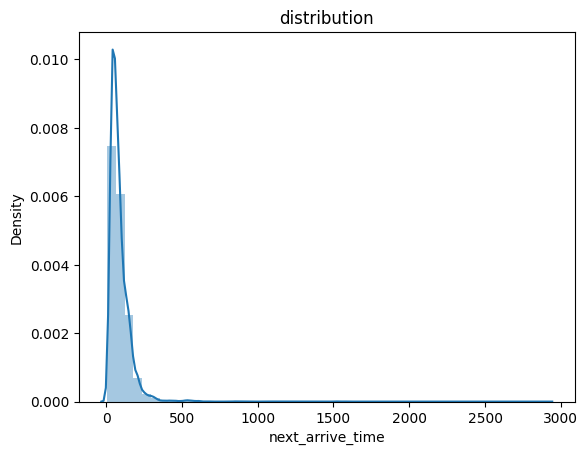

In [7]:
plt.title('distribution')
sns.distplot(df_train['next_arrive_time'])

<Axes: title={'center': 'distribution'}, xlabel='next_arrive_time', ylabel='Density'>

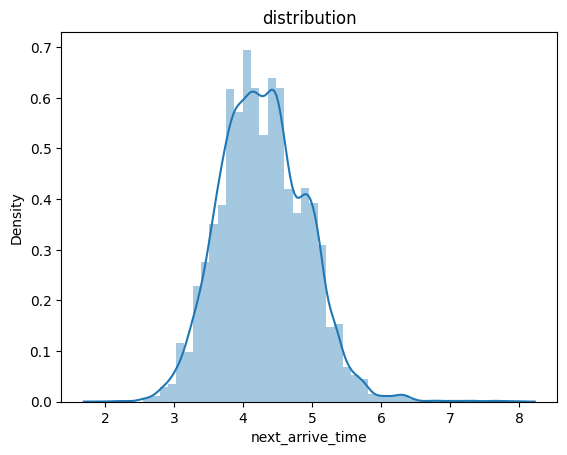

In [8]:
df_train['next_arrive_time'] = np.log1p(df_train['next_arrive_time'])
plt.title('distribution')
sns.distplot(df_train['next_arrive_time'])

In [9]:
df_train['bus_group']='group'

df_train.loc[ (df_train['route_nm']=='360-1') | (df_train['route_nm']=='360-2') | (df_train['route_nm']=='360-7') | (df_train['route_nm']=='360-12'), ['bus_group'] ] = '360'
df_train.loc[ (df_train['route_nm']=='365-21') | (df_train['route_nm']=='365-22'), ['bus_group'] ] = '365'
df_train.loc[ (df_train['route_nm']=='201-11') | (df_train['route_nm']=='201-12') | (df_train['route_nm']=='201-13') | (df_train['route_nm']=='201-14') | (df_train['route_nm']=='201-16') | (df_train['route_nm']=='201-17') | (df_train['route_nm']=='201-18') | (df_train['route_nm']=='201-21') | (df_train['route_nm']=='201-22') | (df_train['route_nm']=='201-24') | (df_train['route_nm']=='201-26') | (df_train['route_nm']=='201-27'), ['bus_group'] ] = '201'
df_train.loc[ (df_train['route_nm']=='281-1') | (df_train['route_nm']=='281-2'), ['bus_group'] ] = '281'

df_train = pd.get_dummies(df_train,columns=['bus_group'])

In [10]:
del df_train['bus_group_group']

In [11]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [12]:
df_train['date']

0       2019-10-15
1       2019-10-15
2       2019-10-15
3       2019-10-15
4       2019-10-15
           ...    
21232   2019-10-16
21233   2019-10-16
21234   2019-10-16
21235   2019-10-16
21236   2019-10-16
Name: date, Length: 21237, dtype: datetime64[ns]

In [13]:
df_train['weekday'] = df_train['date'].dt.weekday

In [14]:
df_train['weekday']

0        1
1        1
2        1
3        1
4        1
        ..
21232    2
21233    2
21234    2
21235    2
21236    2
Name: weekday, Length: 21237, dtype: int64

In [15]:
df_train = pd.get_dummies(df_train,columns=['weekday'])

In [16]:
df_train['time_group'] = 'group'  # time_group 변수를 미리 생성

df_train.loc[(df_train['now_arrive_time'] >= '05시') & (df_train['now_arrive_time'] < '07시'), ['time_group']] = 'morning_1'  # 5~6시
df_train.loc[(df_train['now_arrive_time'] >= '07시') & (df_train['now_arrive_time'] < '09시'), ['time_group']] = 'morning_2'  # 7~8시
df_train.loc[(df_train['now_arrive_time'] >= '09시') & (df_train['now_arrive_time'] < '11시'), ['time_group']] = 'afternoon_1'  # 9~10시
df_train.loc[(df_train['now_arrive_time'] >= '11시') & (df_train['now_arrive_time'] < '13시'), ['time_group']] = 'afternoon_2'  # 11~12시
df_train.loc[(df_train['now_arrive_time'] >= '13시') & (df_train['now_arrive_time'] < '15시'), ['time_group']] = 'afternoon_3'  # 13~14시
df_train.loc[(df_train['now_arrive_time'] >= '15시') & (df_train['now_arrive_time'] < '17시'), ['time_group']] = 'evening_1'  # 15~16시
df_train.loc[(df_train['now_arrive_time'] >= '17시') & (df_train['now_arrive_time'] < '19시'), ['time_group']] = 'evening_2'  # 17~18시
df_train.loc[(df_train['now_arrive_time'] >= '19시') & (df_train['now_arrive_time'] < '21시'), ['time_group']] = 'evening_3'  # 19~20시
df_train.loc[(df_train['now_arrive_time'] >= '21시') & (df_train['now_arrive_time'] < '23시'), ['time_group']] = 'night_1'  # 21~22시
df_train.loc[(df_train['now_arrive_time'] >= '23시') | (df_train['now_arrive_time'] == '00시'), ['time_group']] = 'night_2'  # 23~00시

df_train = pd.get_dummies(df_train, columns=['time_group'])


In [17]:
# 해당 주요 장소의 임의 지역 위도, 경도
up=(33.506286, 126.490312) # 제주국제공항 근처
right=(33.493521, 126.895326) #성산일출봉 근처
down=(33.246742, 126.562387) #서귀포시 근처
center=(33.379724, 126.545315) #성산일출봉 근처

In [18]:
import geopy.distance #거리 계산해주는 패키지 사용

In [19]:
from geopy.distance import distance

up = (33.51411, 126.52969)  # Example coordinates, replace with your actual values
down = (33.48963, 126.49822)
right = (33.49563, 126.54692)
center = (33.48277, 126.48997)

t1 = [distance((i, j), up).km for i, j in zip(df_train['now_latitude'], df_train['now_longitude'])]
t2 = [distance((i, j), down).km for i, j in zip(df_train['now_latitude'], df_train['now_longitude'])]
t3 = [distance((i, j), right).km for i, j in zip(df_train['now_latitude'], df_train['now_longitude'])]
t4 = [distance((i, j), center).km for i, j in zip(df_train['now_latitude'], df_train['now_longitude'])]


In [20]:
total=pd.DataFrame( list(zip( t1,t2,t3,t4)),columns=['up','down','right','center'] )
df_train['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)
df_train = pd.get_dummies(df_train,columns=['dist_name'])

In [23]:
from geopy.distance import distance

# Check for NaN values in latitude and longitude columns
nan_mask = df_train['now_latitude'].isna() | df_train['now_longitude'].isna() | df_train['next_latitude'].isna() | df_train['next_longitude'].isna()

# Set NaN values to 0 for distance calculation (you can adjust this based on your requirements)
df_train[['now_latitude', 'now_longitude', 'next_latitude', 'next_longitude']] = df_train[['now_latitude', 'now_longitude', 'next_latitude', 'next_longitude']].fillna(0)

# Calculate distances using the distance function
df_train['distance_line'] = [distance((i, j), (k, l)).km
                              for i, j, k, l in zip(df_train['now_latitude'], df_train['now_longitude'], df_train['next_latitude'], df_train['next_longitude'])]

# Set distances to 0 for rows with NaN values in original columns
df_train.loc[nan_mask, 'distance_line'] = 0


In [24]:
df_test.drop(['route_id', 'vh_id', 'now_station', 'next_station'], axis=1 , inplace=True)

In [25]:
df_test['bus_group']='group'

df_test.loc[ (df_test['route_nm']=='360-1') | (df_test['route_nm']=='360-2') | (df_test['route_nm']=='360-7') | (df_test['route_nm']=='360-12'), ['bus_group'] ] = '360'
df_test.loc[ (df_test['route_nm']=='365-21') | (df_test['route_nm']=='365-22'), ['bus_group'] ] = '365'
df_test.loc[ (df_test['route_nm']=='201-11') | (df_test['route_nm']=='201-12') | (df_test['route_nm']=='201-13') | (df_test['route_nm']=='201-14') | (df_test['route_nm']=='201-16') | (df_test['route_nm']=='201-17') | (df_test['route_nm']=='201-18') | (df_test['route_nm']=='201-21') | (df_test['route_nm']=='201-22') | (df_test['route_nm']=='201-24') | (df_test['route_nm']=='201-26') | (df_test['route_nm']=='201-27'), ['bus_group'] ] = '201'
df_test.loc[ (df_test['route_nm']=='281-1') | (df_test['route_nm']=='281-2'), ['bus_group'] ] = '281'

df_test = pd.get_dummies(df_test,columns=['bus_group'])

In [26]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['weekday'] = df_test['date'].dt.weekday
df_test = pd.get_dummies(df_test,columns=['weekday'])

In [112]:
df_test['time_group'] = 'group'  # time_group 변수를 미리 생성

df_test.loc[(df_test['now_arrive_time'] >= '05시') & (df_test['now_arrive_time'] < '07시'), ['time_group']] = 'morning_1'  # 5~6시
df_test.loc[(df_test['now_arrive_time'] >= '07시') & (df_test['now_arrive_time'] < '09시'), ['time_group']] = 'morning_2'  # 7~8시
df_test.loc[(df_test['now_arrive_time'] >= '09시') & (df_test['now_arrive_time'] < '11시'), ['time_group']] = 'afternoon_1'  # 9~10시
df_test.loc[(df_test['now_arrive_time'] >= '11시') & (df_test['now_arrive_time'] < '13시'), ['time_group']] = 'afternoon_2'  # 11~12시
df_test.loc[(df_test['now_arrive_time'] >= '13시') & (df_test['now_arrive_time'] < '15시'), ['time_group']] = 'afternoon_3'  # 13~14시
df_test.loc[(df_test['now_arrive_time'] >= '15시') & (df_test['now_arrive_time'] < '17시'), ['time_group']] = 'evening_1'  # 15~16시
df_test.loc[(df_test['now_arrive_time'] >= '17시') & (df_test['now_arrive_time'] < '19시'), ['time_group']] = 'evening_2'  # 17~18시
df_test.loc[(df_test['now_arrive_time'] >= '19시') & (df_test['now_arrive_time'] < '21시'), ['time_group']] = 'evening_3'  # 19~20시
df_test.loc[(df_test['now_arrive_time'] >= '21시') & (df_test['now_arrive_time'] < '23시'), ['time_group']] = 'night_1'  # 21~22시
df_test.loc[(df_test['now_arrive_time'] >= '23시') | (df_test['now_arrive_time'] == '00시'), ['time_group']] = 'night_2'  # 23~00시

df_test = pd.get_dummies(df_test, columns=['time_group'])


In [113]:
from geopy.distance import distance


# Calculate distances using the distance function
df_test['distance_line'] = [distance((i, j), (k, l)).km
                             for i, j, k, l in zip(df_test['now_latitude'], df_test['now_longitude'], df_test['next_latitude'], df_test['next_longitude'])]



In [114]:
from geopy.distance import distance

# Calculate distances using the distance function
t1 = [distance((i, j), up).km for i, j in zip(df_test['now_latitude'], df_test['now_longitude'])]
t2 = [distance((i, j), down).km for i, j in zip(df_test['now_latitude'], df_test['now_longitude'])]
t3 = [distance((i, j), right).km for i, j in zip(df_test['now_latitude'], df_test['now_longitude'])]
t4 = [distance((i, j), center).km for i, j in zip(df_test['now_latitude'], df_test['now_longitude'])]

# Create a DataFrame with distances
total = pd.DataFrame(list(zip(t1, t2, t3, t4)), columns=['up', 'down', 'right', 'center'])

# Find the column name with the minimum distance for each row
df_test['dist_name'] = total.apply(lambda x: x.argmin(), axis=1)

# Create dummy variables for the 'dist_name' column
df_test = pd.get_dummies(df_test, columns=['dist_name'])


In [115]:
input_var = list(df_train.columns[10:]) + ['distance']

X_features = df_train[input_var]
y_target = df_train['next_arrive_time']

input_var

['bus_group_201',
 'bus_group_281',
 'bus_group_360',
 'bus_group_365',
 'weekday_1',
 'weekday_2',
 'time_group_afternoon_1',
 'time_group_afternoon_2',
 'time_group_afternoon_3',
 'time_group_evening_1',
 'time_group_evening_2',
 'time_group_evening_3',
 'time_group_morning_1',
 'time_group_morning_2',
 'time_group_night_1',
 'time_group_night_2',
 'dist_name_0',
 'dist_name_1',
 'dist_name_2',
 'dist_name_3',
 'distance_line',
 'distance']

In [116]:
from sklearn.model_selection import train_test_split

# Assuming X_features and y_target are your original feature matrix and target variable
# Adjust the test_size and random_state based on your requirements
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)


X_train shape: (16989, 22)
X_valid shape: (4248, 22)
y_train shape: (16989,)
y_valid shape: (4248,)


In [117]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)


X_train shape: (16989, 22)
X_test shape: (4248, 22)
y_train shape: (16989,)
y_valid shape: (4248,)


In [118]:
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_test:", X_valid.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum().sum())
print("Missing values in y_train:", y_valid.isnull().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 0
Missing values in y_train: 1
Missing values in y_train: 0


In [119]:
# Identify and remove the row with missing target value
missing_index = y_train.index[y_train.isnull()].tolist()[0]
X_train = X_train.drop(index=missing_index)
y_train = y_train.drop(index=missing_index)


In [120]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('최적 평균 RMSE 값:', np.round(rmse, 4))
    print('최적 파라미터:', grid_model.best_params_)

    return grid_model.best_estimator_

In [121]:
xgb_params

{'n_estimators': [3300]}

In [122]:
import xgboost as xgb

# xgb_params 값을 바꾸어주며 learning_rate, max_depth 등 파라미터 성능 비교 시도했었음.
xgb_params = {'n_estimators':[3300]}

xgb_reg = xgb.XGBRegressor(colsample_bytree=0.8, silent=1, max_depth=5, learning_rate= 0.1, n_estimators=3300,
                           random_state =7, nthread = -1, n_jobs=-1)

best_xgb = get_best_params(xgb_reg, xgb_params)

최적 평균 RMSE 값: 0.3898
최적 파라미터: {'n_estimators': 3300}


In [123]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3300, n_jobs=-1, nthread=-1,
             num_parallel_tree=None, ...)

In [124]:


from lightgbm import LGBMRegressor

# lgbm_params 값을 바꾸어주며 learning_rate, max_depth 등 파라미터 성능 비교 시도했었음.
lgbm_params = {'n_estimators':[3300]}

lgbm_reg = LGBMRegressor(n_estimators=3300, bagging_fraction=0.7, learning_rate=0.1,
                         max_depth=4, subsample=0.7, feature_fraction=0.9, boosting_type='gbdt',
                         colsample_bytree=0.5, reg_lambda=5, n_jobs=-1)

best_lgbm = get_best_params(lgbm_reg, lgbm_params)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [125]:


best_lgbm

LGBMRegressor(bagging_fraction=0.7, colsample_bytree=0.5, feature_fraction=0.9,
              max_depth=4, n_estimators=3300, n_jobs=-1, reg_lambda=5,
              subsample=0.7)

In [126]:
df_test

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,bus_group_201,...,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name_0,dist_name_1,dist_name_2,dist_name_3
0,210457,2019-10-29,360-1,33.457724,126.554014,07시,333.0,33.458783,126.557353,0,...,0,0,0,1,0,0,0,0,1,0
1,210458,2019-10-29,360-1,33.458783,126.557353,07시,415.0,33.459893,126.561624,0,...,0,0,0,1,0,0,0,0,1,0
2,210459,2019-10-29,360-1,33.478867,126.483833,08시,417.0,33.478850,126.488350,0,...,0,0,0,1,0,0,0,0,0,1
3,210460,2019-10-29,360-1,33.478850,126.488350,08시,334.0,33.480700,126.489933,0,...,0,0,0,1,0,0,0,0,0,1
4,210461,2019-10-29,360-1,33.480700,126.489933,08시,550.0,33.482077,126.485355,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22403,232901,2019-10-31,365-22,33.504099,126.526639,13시,253.0,33.502112,126.527961,0,...,0,0,0,0,0,0,1,0,0,0
22404,232902,2019-10-31,365-22,33.502112,126.527961,13시,329.0,33.499560,126.529771,0,...,0,0,0,0,0,0,1,0,0,0
22405,232903,2019-10-31,365-22,33.493109,126.535091,13시,525.0,33.489414,126.538642,0,...,0,0,0,0,0,0,0,0,1,0
22406,232904,2019-10-31,365-22,33.489414,126.538642,13시,642.0,33.484860,126.542928,0,...,0,0,0,0,0,0,0,0,1,0


In [128]:
input_var = list(df_train.columns[10:]) + ['distance']

X_features = df_train[input_var]
y_target = df_train['next_arrive_time']

input_var

['bus_group_201',
 'bus_group_281',
 'bus_group_360',
 'bus_group_365',
 'weekday_1',
 'weekday_2',
 'time_group_afternoon_1',
 'time_group_afternoon_2',
 'time_group_afternoon_3',
 'time_group_evening_1',
 'time_group_evening_2',
 'time_group_evening_3',
 'time_group_morning_1',
 'time_group_morning_2',
 'time_group_night_1',
 'time_group_night_2',
 'dist_name_0',
 'dist_name_1',
 'dist_name_2',
 'dist_name_3',
 'distance_line',
 'distance']

In [129]:
df_test

,id,date,route_nm,now_latitude,now_longitude,now_arrive_time,distance,next_latitude,next_longitude,bus_group_201,...,time_group_evening_2,time_group_evening_3,time_group_morning_1,time_group_morning_2,time_group_night_1,time_group_night_2,dist_name_0,dist_name_1,dist_name_2,dist_name_3
0,210457,2019-10-29,360-1,33.457724,126.554014,07시,333.0,33.458783,126.557353,0,...,0,0,0,1,0,0,0,0,1,0
1,210458,2019-10-29,360-1,33.458783,126.557353,07시,415.0,33.459893,126.561624,0,...,0,0,0,1,0,0,0,0,1,0
2,210459,2019-10-29,360-1,33.478867,126.483833,08시,417.0,33.478850,126.488350,0,...,0,0,0,1,0,0,0,0,0,1
3,210460,2019-10-29,360-1,33.478850,126.488350,08시,334.0,33.480700,126.489933,0,...,0,0,0,1,0,0,0,0,0,1
4,210461,2019-10-29,360-1,33.480700,126.489933,08시,550.0,33.482077,126.485355,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22403,232901,2019-10-31,365-22,33.504099,126.526639,13시,253.0,33.502112,126.527961,0,...,0,0,0,0,0,0,1,0,0,0
22404,232902,2019-10-31,365-22,33.502112,126.527961,13시,329.0,33.499560,126.529771,0,...,0,0,0,0,0,0,1,0,0,0
22405,232903,2019-10-31,365-22,33.493109,126.535091,13시,525.0,33.489414,126.538642,0,...,0,0,0,0,0,0,0,0,1,0
22406,232904,2019-10-31,365-22,33.489414,126.538642,13시,642.0,33.484860,126.542928,0,...,0,0,0,0,0,0,0,0,1,0


In [130]:
X_train = df_train[input_var]
X_test = df_test[input_var]

y_train = df_train['next_arrive_time']

In [131]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3300, n_jobs=-1, nthread=-1,
             num_parallel_tree=None, ...)

In [137]:
import xgboost as xgb

# 위의 베스트 파라미터 사용
xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=3300,
             n_jobs=-1, nthread=-1, objective='reg:linear', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)

In [138]:
xgb_reg.fit(X_train, y_train)

xgb_pred = np.expm1(xgb_reg.predict(X_test))

XGBoostError: ignored

In [ ]:
best_lgbm

In [ ]:

from lightgbm import LGBMRegressor

# 위의 베스트 파라미터 사용
lgbm_reg = LGBMRegressor(bagging_fraction=0.7, boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.5, feature_fraction=0.9,
              importance_type='split', learning_rate=0.1, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3300, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=5, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [ ]:



lgbm_reg.fit(X_train, y_train)

lgbm_pred = np.expm1(lgbm_reg.predict(X_test.values))

In [ ]:
ensemble = xgb_pred*0.3 + lgbm_pred*0.7 # 테스트 결과 이 비율이 성능이 높았음.

In [ ]:
# 적용
df_test['next_arrive_time'] = ensemble

In [ ]:
# 적용된 값 확인
df_test[['id','next_arrive_time']].head(5)

In [ ]:
# submission.csv 파일로 저장
df_test[['id','next_arrive_time']].to_csv("submission.csv", index=False)

In [ ]:
NLinear